In [8]:
#Importing Required libraries

In [9]:
import numpy as np
import pandas as pd

This error message usually occurs when there is an issue with the file path specified in the pd.read_csv function. The error is indicating that the file path contains a unicode escape sequence (e.g., \U) that cannot be decoded by the 'unicodeescape' codec.
Three methods to solve this issue

1.Use a raw string literal by prefixing the string with r

2.Use forward slashes (/) instead of backslashes (\) in the file path

3.Escape any backslashes in the file path

In [10]:
df_ratings=pd.read_csv(r"C:\Users\RajeshS\Real projects\Projects\Recommendation\Book\Ratings_df.csv",encoding='latin-1')
df_books=pd.read_csv(r"C:\Users\RajeshS\Real projects\Projects\Recommendation\Book\Books_df.csv",encoding='latin-1')
df_user=pd.read_csv(r"C:\Users\RajeshS\Real projects\Projects\Recommendation\Book\users_df.csv",encoding='latin-1')


C:\Users\RajeshS\AppData\Local\Temp\ipykernel_5748\1815688679.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books=pd.read_csv(r"C:\Users\RajeshS\Real projects\Projects\Recommendation\Book\Books_df.csv",encoding='latin-1')


reading a CSV file named 'BX-Book-Ratings.csv' into a pandas DataFrame named df_ratings. The encoding parameter is set to 'latin-1', which indicates the encoding format of the file. This is useful if the file contains characters that are not part of the ASCII character set.

In [11]:
# Checking first 5 rows
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [12]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [13]:
df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

The NearestNeighbors class is a type of unsupervised machine learning algorithm that is used for finding the k-nearest neighbors of a set of points in a high-dimensional space.

The DictVectorizer is a utility class for converting categorical data stored in dictionaries into numerical feature vectors suitable for use with scikit-learn algorithms.DictVectorizer class automatically converts categorical variables into binary features using one-hot encoding, so each unique value for each categorical variable is represented as a separate binary feature in the resulting matrix.

The cosine_similarity function calculates the cosine similarity between two sets of vectors, which is a measure of the similarity between two non-zero vectors of an inner product space. The cosine similarity is defined as the cosine of the angle between the two vectors.The result is a 2x2 matrix containing the cosine similarity between each pair of vectors, where each value is a number between -1 and 1, with 1 indicating that the vectors are identical, -1 indicating that they are completely dissimilar, and values closer to 0 indicating that they are less similar.

TF-IDF stands for Term Frequency-Inverse Document Frequency, and is a numerical statistic used to reflect how important a word is to a document in a collection of documents. The basic idea is to scale the frequency of a word in a document by the inverse of its frequency across all documents, so that words that are common across many documents are given less weight and words that are unique to a particular document are given more weight.


In [15]:
#shape of the datasets
print('books shape',df_books.shape)
print('ratings',df_ratings.shape)
print('users',df_user.shape)

books shape (271360, 8)
ratings (1149780, 3)
users (278858, 3)


In [16]:
df_books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [17]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [18]:
# Calcuating missing value percentage in books dataset
missing_values_percentage=(df_books.isnull().sum()/df_books.shape[0])*100
missing_values_percentage.sort_values(ascending=False)

Image-URL-L            0.001106
Publisher              0.000737
Book-Author            0.000369
ISBN                   0.000000
Book-Title             0.000000
Year-Of-Publication    0.000000
Image-URL-S            0.000000
Image-URL-M            0.000000
dtype: float64

In [19]:
#checking for null value in book authore column
df_books.loc[df_books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [20]:
# checking for null value in publisher column
df_books.loc[df_books['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [21]:
# Replacing publisher null values with other
df_books['Publisher']=df_books['Publisher'].replace(np.nan,'other')

In [22]:
df_books.loc[df_books['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [23]:
# Replacing book author null values with other
df_books['Book-Author']=df_books['Book-Author'].replace(np.nan,'other')

In [24]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271360 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [44]:
books=df_books.copy()

In [45]:
#parsing date column
books['Year-Of-Publication']=pd.to_datetime(books['Year-Of-Publication'],errors='ignore')

In [46]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

we have 0,DK publishing Inc,Gallimard and string year in year column which shall be replaced

In [47]:
books.loc[books['Year-Of-Publication']=='DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [48]:
pd.set_option('display.max_columns', None) #sets the number of the maximum columns shown
pd.set_option('display.max_colwidth', -1) #sets the maximum width of each single field
books.loc[books['Year-Of-Publication']=='DK Publishing Inc',:]['Book-Title']

C:\Users\RajeshS\AppData\Local\Temp\ipykernel_5748\3996418993.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) #sets the maximum width of each single field


209538    DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"       
221678    DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"
Name: Book-Title, dtype: object

In [49]:
books.loc[books.ISBN=='078946697X','Year-Of-Publication']=2000
books.loc[books.ISBN=='078946697X','Book-Author']='Michael Teitelbaum'
books.loc[books.ISBN=='078946697X','Publisher']='DK Publishing Inc'
books.loc[books.ISBN=='078946697X','Book-Title']='DK Readers: Creating the X-Men, How It All Began'

In [50]:
books.loc[books.ISBN=='0789466953','Year-Of-Publication']=2000
books.loc[books.ISBN=='0789466953','Book-Author']='James Buckley'
books.loc[books.ISBN=='0789466953','Publisher']='DK Publishing Inc'
books.loc[books.ISBN=='0789466953','Book-Title']='DK Readers: Creating the X-Men, How Comic Books Come to Life'

In [51]:
books.loc[books['Year-Of-Publication']=='Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?ÃÂ©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [52]:
books.loc[books['Year-Of-Publication']=='Gallimard',:]['Book-Title']

220731    Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?ÃÂ©zio"
Name: Book-Title, dtype: object

In [54]:
books.loc[books.ISBN=='2070426769','Year-Of-Publication']=2003
books.loc[books.ISBN=='2070426769','Book-Author']='Gallimard'
books.loc[books.ISBN=='2070426769','Publisher']='other'
books.loc[books.ISBN=='2070426769','Book-Title']='other'

In [56]:
books[books['Year-Of-Publication']==0]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3150000335.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3150000335.01.LZZZZZZZ.jpg
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/342311360X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/342311360X.01.LZZZZZZZ.jpg
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0571197639.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0571197639.01.LZZZZZZZ.jpg
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3596214629.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3596214629.01.LZZZZZZZ.jpg
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda Del Fiume Piedra,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/8845229041.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/8845229041.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/014029953X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/014029953X.01.LZZZZZZZ.jpg
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0340571187.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0340571187.01.LZZZZZZZ.jpg
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/8427201079.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/8427201079.01.LZZZZZZZ.jpg
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0887781721.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0887781721.01.LZZZZZZZ.jpg


In [57]:
#There must be some issue with format.Let's do correction of the same using numeric
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'],errors='coerce')

The code is converting the 'Year-Of-Publication' column of a Pandas DataFrame called 'books' to numeric values using the pd.to_numeric function. The errors='coerce' argument tells the function to replace any non-numeric values with NaN (Not a Number) values.

This line of code is useful when working with data where the 'Year-Of-Publication' column may contain values that are not numbers, but need to be converted to numeric values for further analysis. The pd.to_numeric function makes it easy to convert a column to numeric values and handle any non-numeric values appropriately.

In [61]:
print(sorted(list(books['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


The code sorts the unique values of the 'Year-Of-Publication' column in the 'books' DataFrame and then converts the result to a list. The list of unique values is then printed using the print function.

This line of code can be used to get a sense of the distribution of publication years in the data. By printing the sorted list of unique publication years, you can easily see any potential outliers or missing values (represented by NaN) in the data. This information can be useful in understanding the structure of the data and making informed decisions about how to handle missing or unusual values.

In [63]:
#converting values above 2021 year and 0 year to nan
books.loc[(books['Year-Of-Publication']>2021)|(books['Year-Of-Publication']==0),'Year-Of-Publication']=np.nan

In [64]:
print(sorted(list(books['Year-Of-Publication'].unique())))

[1920.0, 1941.0, 1942.0, 1951.0, 1952.0, 1953.0, 1954.0, 1956.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, nan, 1376.0, 1378.0, 1806.0, 1897.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1909.0, 1910.0, 1911.0, 1914.0, 1917.0, 1919.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1955.0, 1957.0, 1967.0, 2005.0, 2006.0, 2008.0, 2010.0, 2011.0, 2012.0, 2020.0, 2021.0]


In [69]:
#filling nan values with median
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()),inplace=True)

In [70]:
print(sorted(list(books['Year-Of-Publication'].unique())))

[1376.0, 1378.0, 1806.0, 1897.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1909.0, 1910.0, 1911.0, 1914.0, 1917.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2008.0, 2010.0, 2011.0, 2012.0, 2020.0, 2021.0]


In [74]:
books.isnull().sum()
#zero null values except Image-URL-L(No problem we will continue with the same)
#But 1376 and 1378 year of publishing is bit out of the context, hence will try to replace the same with 2000

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [75]:
books.loc[books['Year-Of-Publication']==1378,:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378.0,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.LZZZZZZZ.jpg


In [76]:
books.loc[books['ISBN']==9643112136,'Year-Of-Publication']=2000

In [77]:
books.loc[books['Year-Of-Publication']==1376,:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
253750,964442011X,Tasht-i khun,IsmaÃÂ°il Fasih,1376.0,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.LZZZZZZZ.jpg


In [78]:
books.loc[books['ISBN']=='964442011X','Year-Of-Publication']=2000

In [81]:
df_ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [82]:
#Ratings dataset should have books only which exist in our books dataset
ratings=df_ratings[df_ratings.ISBN.isin(books.ISBN)]

In [83]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [84]:
df_ratings.shape,ratings.shape
#It can be seen that many rows having book ISBN not part of books dataset got dropped off

((1149780, 3), (1031136, 3))

In [85]:
df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [86]:
users=df_user.copy()

In [88]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [89]:
def missing_values(df):
    mis_val=df.isnull().sum()
    miss_val_percent=round(df.isnull().mean()*100,2)
    mz_table=pd.concat([mis_val,miss_val_percent],axis=1)
    mz_table=mz_table.rename(columns={df.index.name:'col_name',0:'Missing values',1:'% of total values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of total values',ascending=False)
    return mz_table.reset_index()

In [90]:
missing_values(users)
#Age is having 39.72% missing values which is huge

,index,Missing values,% of total values,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


In [92]:
#location of missing values 
users.loc[users['Age'].isnull(),:]['Location'].unique()

array(['nyc, new york, usa', 'moscow, yukon territory, russia',
       'farnborough, hants, united kingdom', ...,
       'llangollen, denbighshire county, united kingdom.',
       'jÃ¤rvenpÃ¤Ã¤, uusimaa, finland', 'sergnano, lombardia, italy'],
      dtype=object)

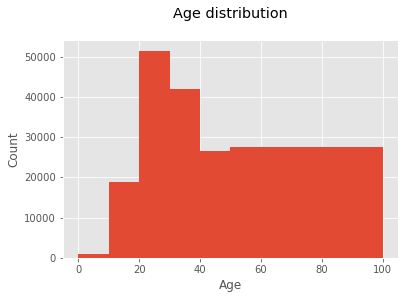

In [94]:
from matplotlib import style
style.use('ggplot')
users.Age.hist(bins=[0,10,20,30,40,50,100])
plt.title('Age distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### The most active users are among those in their 20-30's

<AxesSubplot:xlabel='Age'>

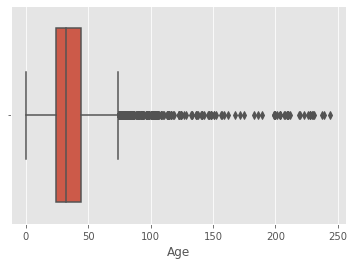

In [95]:
sns.boxplot(x='Age',data=users)

In [96]:
print(sorted(list(users.Age.unique())))
#We have outliers in data

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [98]:
users.Location[0:2]

0    nyc, new york, usa       
1    stockton, california, usa
Name: Location, dtype: object

If we see location column ,we have 3 names..street,city,country.Let's extract country from the same

In [99]:
for i in users:
    users['country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

The code adds a new column to the dataframe called "country", which is extracted from the "Location" column.The code uses the str.extract method of the Pandas library, which allows you to extract a pattern from a string.This pattern matches a string that starts with one or more commas (\,+), optionally followed by whitespace (\s?), and then one or more word characters (\w*) that are optionally separated by whitespace (\s?\w*). The pattern ends with an optional double quote (\"*) and the end of the string ($).So, for example, if the "Location" column of a row contains the string "Boston, MA, USA", the code will extract the string "USA" and store it in the "country" column of that row.

In [100]:
users.head()

,User-ID,Location,Age,country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


In [101]:
#Let's drop Location column
users.drop('Location',axis=1,inplace=True)

In [102]:
users['country']=users['country'].astype('str')

In [103]:
a=list(users.country.unique())#
a=set(a)
a=list(a)
a=[x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn wÃ¼rtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedÃ\xa0', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'canada'

The code starts by creating a list of unique values of the "country" column using the unique method.

It then converts the list to a set to remove any duplicate values.

The set is then converted back to a list.

The code uses a list comprehension to remove any elements that are None from the list.

Finally, the code sorts the list.

In [104]:
#Let's replace wrong items in list
users['country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

<AxesSubplot:>

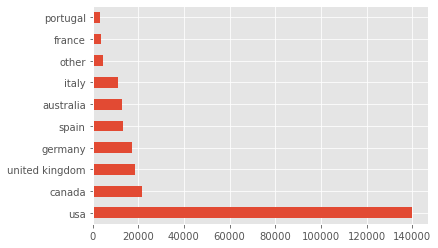

In [105]:
users['country'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh')

### Most number of users are from USA followed by canada and UK

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

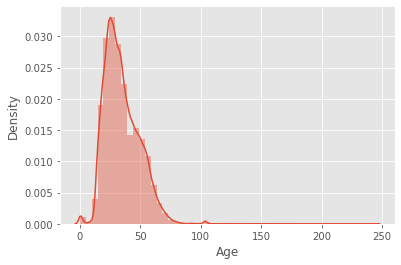

In [106]:
sns.distplot(users['Age'])

### Age below 5 and above 100 do not make sense.Will remove them.

In [107]:
users.loc[(users.Age>100)|(users.Age<5),'Age']=np.nan

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

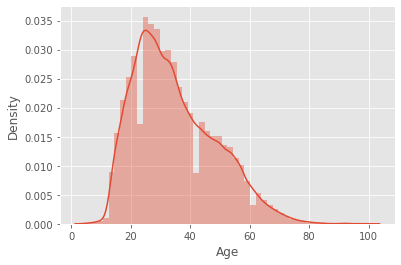

In [108]:
sns.distplot(users['Age'])

In [109]:
users['Age']=users['Age'].fillna(users.groupby('country')['Age'].transform('median'))

The code starts by calling the fillna method on the "Age" column.

The missing values are filled with the median age of the same country, which is calculated using the groupby and transform methods

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

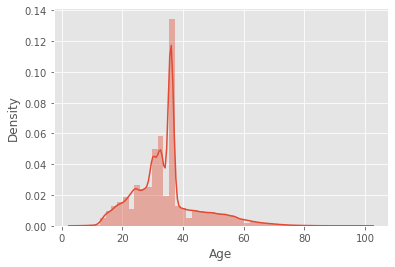

In [110]:
sns.distplot(users['Age'])
#we can see clear spike in middle portion as we have replaced null values with median

In [111]:
users.isnull().sum()

User-ID    0  
Age        273
country    0  
dtype: int64

In [112]:
#fill remaining null values with mean
users['Age']=users['Age'].fillna(users['Age'].mean())

In [113]:
users.isnull().sum()

User-ID    0
Age        0
country    0
dtype: int64

In [114]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

<AxesSubplot:>

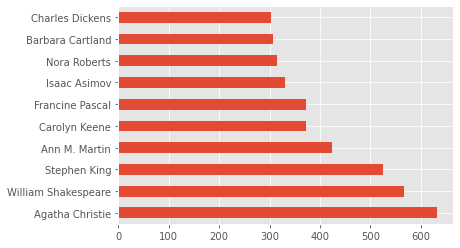

In [116]:
#Top 10 book authors
books['Book-Author'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh')

### Agatha Christie has written more published books followed by William Shakespeare and Stephen King

<AxesSubplot:>

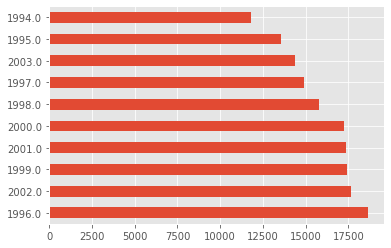

In [118]:
books['Year-Of-Publication'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh')

<AxesSubplot:>

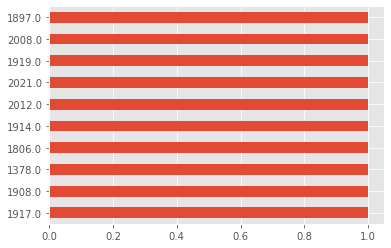

In [119]:
books['Year-Of-Publication'].value_counts().sort_values(ascending=False).tail(10).plot(kind='barh')

### More number of books published in the year of 1996 followed by 2002 & 1999.Least in 1897 followed by 1919,2008&2012

<AxesSubplot:>

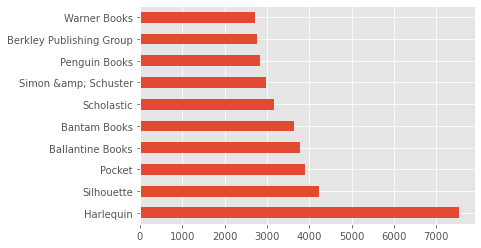

In [120]:
books.Publisher.value_counts().sort_values(ascending=False)[:10].plot(kind='barh')

### Harlequin is the lead publisher

In [121]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [122]:
ratings_new=ratings[ratings['User-ID'].isin(users['User-ID'])]

In [123]:
ratings_new

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


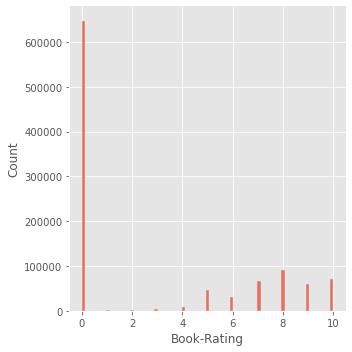

In [124]:
sns.displot(ratings_new['Book-Rating'])

### The ratings are very unevenly distributed, and the vast majority of ratings are 0 .As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit and explict ratings datasets

In [125]:
ratings_explicit=ratings_new[ratings_new['Book-Rating']!=0]
ratings_implicit=ratings_new[ratings_new['Book-Rating']==0]

In [126]:
ratings_explicit.shape

(383842, 3)

In [127]:
ratings_implicit.shape

(647294, 3)

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

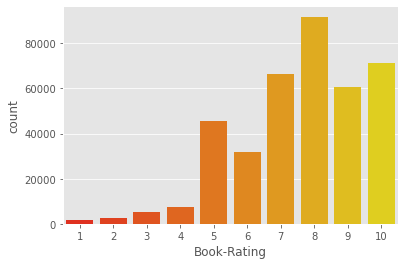

In [128]:
sns.countplot(data=ratings_explicit,x='Book-Rating',palette='autumn')

### Users rated mostly 8 after 0

In [129]:
rating_count=pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())

In [136]:
rating_count.sort_values(ascending=False,by='Book-Rating').head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


In [132]:
#	The Lovely Bones: A Novel book got more ratings
books.loc[books.ISBN=='0316666343',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg


In [135]:
most_rated_books=pd.DataFrame(['0316666343','0971880107','0385504209','0312195516','0060928336'],index=np.arange(5),
                             columns=['ISBN'])
most_rated_books_summary=pd.merge(most_rated_books,books,on='ISBN')
most_rated_books_summary
#top 5 rated books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg


In [138]:
ratings_explicit['Ave_rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
ratings_explicit['Total_users_rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

C:\Users\RajeshS\AppData\Local\Temp\ipykernel_5748\67134294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit['Ave_rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
C:\Users\RajeshS\AppData\Local\Temp\ipykernel_5748\67134294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit['Total_users_rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')


In [322]:
Final_dataset=users.copy()
Final_dataset=pd.merge(Final_dataset,ratings_explicit,on='User-ID')
Final_dataset=pd.merge(Final_dataset,books,on='ISBN')
Final_dataset.head()

,User-ID,Age,country,ISBN,Book-Rating,Ave_rating,Total_users_rated,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,8,33.0,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
1,11676,27.0,nan,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,67544,30.0,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
3,116866,32.0,other,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
4,123629,33.0,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg


In [141]:
missing_values(Final_dataset)

,index,Missing values,% of total values,Data_type
0,User-ID,0,0.0,int64
1,Age,0,0.0,float64
2,country,0,0.0,object
3,ISBN,0,0.0,object
4,Book-Rating,0,0.0,int64
5,Ave_rating,0,0.0,float64
6,Total_users_rated,0,0.0,int64
7,Book-Title,0,0.0,object
8,Book-Author,0,0.0,object
9,Year-Of-Publication,0,0.0,float64


In [142]:
Final_dataset.shape

(383842, 14)

In [147]:
#Removing Image rows as they are not necessary for now
Final_dataset.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)

<AxesSubplot:>

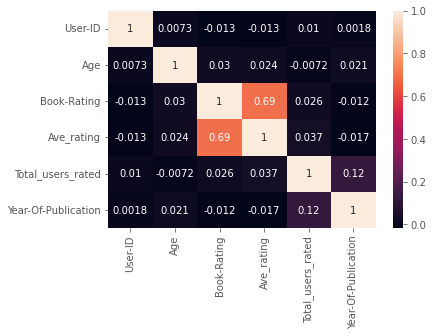

In [149]:
sns.heatmap(Final_dataset.corr(),annot=True)
#No such major outcome from heatmap,I am using all the columns

In [150]:
Final_dataset.shape

(383841, 11)

In [332]:
Final_dataset=Final_dataset[Final_dataset['ISBN']!='0613496744']

In [153]:
Final_dataset.sample(5)

,User-ID,Age,country,ISBN,Book-Rating,Ave_rating,Total_users_rated,Book-Title,Book-Author,Year-Of-Publication,Publisher
347229,185233,31.0,usa,0788749730,9,9.000000,1,"Left Behind: A Novel of the Earth's Last Days (Left Behind, 1)",Lahaye,2000.0,Recorded Books
119727,60488,59.0,usa,0316153915,8,7.550000,20,Chasing the Dime,Michael Connelly,2002.0,"Little, Brown"
244532,56399,63.0,united kingdom,0932445063,10,10.000000,1,Pulptime,P. H. Cannon,1985.0,W Paul Ganley Pub
7009,216432,60.0,usa,0380730138,8,6.685393,89,Vinegar Hill (Oprah's Book Club (Paperback)),A. Manette Ansay,1998.0,Perennial
130838,234743,36.0,usa,0451191013,5,6.740741,27,The Regulators,Stephen King,2002.0,Signet Book


# Recommendation Systems

In [154]:
bookName=input('Enter a book name: ')
Number=int(input('Enter number of books to recommend: '))
# Our aim is when user entering the book name, we have to recommend books and the number of books to be recommeneded will be decided by user

Enter a book name: Chasing the Dime
Enter number of books to recommend: 5


# 1.Popularity based(Top in whole collection):

In [161]:
#Top 5 books based on number of ratings
Final_dataset.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values('Book-Rating',ascending=False).head(5)

,ISBN,Book-Rating
21945,0316666343,707
117744,0971880107,581
38819,0385504209,487
18058,0312195516,383
4131,0060928336,320


In [162]:
#Let's use the same for recommendation through defining a function
def popularity_based(df,n):
    if n>=1 and n<=len(df):
        data=pd.DataFrame(df.groupby('ISBN')['Book-Rating'].count()).sort_values('Book-Rating',ascending=False).head(n)
        result=pd.merge(data,books,on='ISBN')
        return result
    return 'Invalid number of books entered'

In [163]:
print('top', Number, 'popular books are:')
popularity_based(Final_dataset,5)

top 5 popular books are:


,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0316666343,707,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
1,0971880107,581,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
2,0385504209,487,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
3,0312195516,383,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
4,0060928336,320,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg


### 2.Popularity based(Top in given place)

In [167]:
Final_dataset[Final_dataset['country']=='usa'].head(2)

,User-ID,Age,country,ISBN,Book-Rating,Ave_rating,Total_users_rated,Book-Title,Book-Author,Year-Of-Publication,Publisher
16,9,36.0,usa,0452264464,6,7.772152,79,Beloved (Plume Contemporary Fiction),Toni Morrison,1994.0,Plume
17,3373,30.0,usa,0452264464,10,7.772152,79,Beloved (Plume Contemporary Fiction),Toni Morrison,1994.0,Plume


In [168]:
location=Final_dataset[Final_dataset['country']=='usa']
popularity_based(location,5)

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0316666343,532,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
1,0385504209,393,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
2,0312195516,302,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
3,0971880107,300,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
4,0142001740,271,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0142001740.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0142001740.01.LZZZZZZZ.jpg


In [169]:
#So let's apply above code through function
def place_based(df,place):
    place=place.lower()
    if place in list(df['country'].unique()):
        return df.loc[df['country']==place]
    else:
        return 'Invalid Entry'

In [170]:
place=input('Enter the name of place: ')
data=place_based(Final_dataset,place)
if isinstance(data,pd.DataFrame):
    data=popularity_based(data,Number)
data

Enter the name of place: usa


,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0316666343,532,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
1,0385504209,393,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
2,0312195516,302,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
3,0971880107,300,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
4,0142001740,271,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0142001740.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0142001740.01.LZZZZZZZ.jpg


### 3.Books by same author, publisher of given book name

In [181]:
def printbook(df,n):
    z=df['Book-Title'].unique()
    for x in range(len(z)):
        print(z[x])
        if x>=n-1:
            break
    

Above code gets the unique book titles from a Pandas DataFrame df in a for loop. The parameter n specifies the number of unique book titles to print. The code uses the unique() method of the book_title column of the DataFrame to get an array of unique book titles, and the for loop iterates over this array. The loop stops after printing n unique book titles or after printing all unique book titles, whichever comes first.

It's important to note that the loop stops after n iterations or after all unique book titles have been printed, but it continues to print the rest of the unique book titles if n is greater than the number of unique book titles.

In [177]:
book_name='Harry Potter and the Goblet of Fire'
Final_dataset['Book-Author'].unique()

array(['Richard Bruce Wright', 'Ann Beattie', 'Sheila Heti', ...,
       'Claude Dooley', 'Jeremy Lloyd', 'Mapsco'], dtype=object)

In [176]:
Final_dataset[Final_dataset['Book-Title']!=book_name].head(2)

,User-ID,Age,country,ISBN,Book-Rating,Ave_rating,Total_users_rated,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,33.0,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,27.0,nan,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [178]:
au=Final_dataset['Book-Author'].unique()
data=Final_dataset[Final_dataset['Book-Title']!=book_name]
au[0]

'Richard Bruce Wright'

In [182]:
def get_books(dataframe,name,n):
    print('\nbooks by same Author:\n')
    au=dataframe['Book-Author'].unique()
    data=Final_dataset[Final_dataset['Book-Title']!=name]
    if au[0] in list(data['Book-Author'].unique()):
        k2=data[data['Book-Author']==au[0]]
    k2=k2.sort_values(by=['Book-Rating'])
    printbook(k2,n)#from printbook function
    print('\n\nbooks by same publisher\:n')
    au=dataframe['Publisher'].unique()
    if au[0] in list(data['Publisher'].unique()):
        k2=pd.DataFrame(data[data['Publisher']==au[0]])
    k2=k2.sort_values(by='Book-Rating')
    printbook(k2,n)    

A function called get_books that takes as input a Pandas DataFrame dataframe, a book title name, and a number n. The function prints the books by the same author and the same publisher as the book specified by name, sorted by their ratings in descending order, and limited to the top n books.

The function starts by printing a message indicating that it is printing books by the same author. It then finds the unique author name of the book specified by name from the Book-Author column of the DataFrame. The rest of the DataFrame excluding the specified book is stored in data. The code then checks if the author of the specified book is present in the list of unique authors in data, and if so, it creates a new DataFrame k2 with all the books by the same author. The resulting DataFrame k2 is sorted by rating using the sort_values() method. Finally, the printbook function is called to print the top n books by the same author.

The process is repeated for books by the same publisher, with a message indicating that the books are by the same publisher. The unique publisher of the specified book is found, and a new DataFrame k2 is created with all the books by the same publisher. This DataFrame is sorted by rating and the top n books are printed using the printbook function.

It's important to note that the code assumes that the DataFrames used, Final_dataset and data, have columns with the exact names mentioned in the code. Also, the function does not return any value, it only prints the books.

In [184]:
bookName='Harry Potter and the Goblet of Fire'
if bookName in list(Final_dataset['Book-Title'].unique()):
    d=Final_dataset[Final_dataset['Book-Title']==bookName]
    get_books(d,bookName,Number)
else:
    print('Invalid book Name!!')


books by same Author:

Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter y el cÃÂ¡liz de fuego


books by same publisher\:n
Thinner
One Child
Bless Me, Ultima
Heart of the Matter (Penguin Twentieth-Century Classics)
Welcome to the World, Baby Girl


### 4.Books popular yearly

In [186]:
data=pd.DataFrame(Final_dataset.groupby('ISBN')['Book-Rating'].count()).sort_values('Book-Rating',ascending=False)
data=pd.merge(data,books,on='ISBN')
data

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0316666343,707,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
1,0971880107,581,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
2,0385504209,487,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
3,0312195516,383,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
4,0060928336,320,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...,...
149830,0553100130,1,The Death of Innocents,Richard Firstman,1997.0,Bantam,http://images.amazon.com/images/P/0553100130.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553100130.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553100130.01.LZZZZZZZ.jpg
149831,0553099817,1,Caring for Your School-Age Child: Ages 5 to 12 (The American Academy of Pediatrics),Edward L. Schor,1995.0,Bantam Dell Pub Group,http://images.amazon.com/images/P/0553099817.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553099817.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553099817.01.LZZZZZZZ.jpg
149832,0553099809,1,Fractured Fairy Tales,A. J. Jacobs,1997.0,Bantam,http://images.amazon.com/images/P/0553099809.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553099809.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553099809.01.LZZZZZZZ.jpg
149833,0553099744,1,Darksaber (Star Wars),Kevin J. Anderson,1995.0,Bantam Dell Pub Group,http://images.amazon.com/images/P/0553099744.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553099744.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553099744.01.LZZZZZZZ.jpg


In [187]:
years=set()
indices=[]
for ind, row in data.iterrows():
    if row['Year-Of-Publication'] in years:
        indices.append(ind)
    else:
        years.add(row['Year-Of-Publication'])
data=data.drop(indices)
data=data.sort_values('Year-Of-Publication')
pd.set_option("display.max_rows",None, "display.max_columns", None)
data
        

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
61186,9643112136,1,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378.0,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.LZZZZZZZ.jpg
130402,0781228956,1,"Complete Works 10 Volumes [2,6,7,8,9] (Notable American Authors)",Benjamin Franklin,1806.0,Reprint Services Corp,http://images.amazon.com/images/P/0781228956.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0781228956.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0781228956.01.LZZZZZZZ.jpg
74651,1551103982,1,The Cycling Adventures of Coconut Head: A North American Odyssey,Ted Schredd,1900.0,Graphic Arts Center Pub Co,http://images.amazon.com/images/P/1551103982.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1551103982.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1551103982.01.LZZZZZZZ.jpg
122730,0671825356,1,W D HSE PLANTS,Jd Hersey,1901.0,Simon &amp; Schuster,http://images.amazon.com/images/P/0671825356.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671825356.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671825356.01.LZZZZZZZ.jpg
45949,0373226888,2,Tommy's Mom,Linda O. Johnston,1902.0,Harlequin,http://images.amazon.com/images/P/0373226888.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0373226888.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0373226888.01.LZZZZZZZ.jpg
104398,038528120X,1,CATCH 22,JOSEPH HELLER,1904.0,Delta,http://images.amazon.com/images/P/038528120X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/038528120X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/038528120X.01.LZZZZZZZ.jpg
103214,0404089119,1,Charlotte Bronte and Her Sisters,Clement K. Shorter,1906.0,Ams Pr,http://images.amazon.com/images/P/0404089119.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0404089119.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0404089119.01.LZZZZZZZ.jpg
27033,0911662251,3,Kybalion: A Study of the Hermetic Philosophy of Ancient Egypt and Greece,Three Initiates,1908.0,Yoga Publication Society,http://images.amazon.com/images/P/0911662251.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0911662251.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0911662251.01.LZZZZZZZ.jpg
83913,0891908994,1,Bitter Winds of Love,Barbara Cartland,1911.0,Amereon Ltd,http://images.amazon.com/images/P/0891908994.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0891908994.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0891908994.01.LZZZZZZZ.jpg
5104,0684717603,10,The GREAT GATSBY (Scribner Classic),F. Scott Fritzgerald,1920.0,Scribner Paper Fiction,http://images.amazon.com/images/P/0684717603.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0684717603.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0684717603.01.LZZZZZZZ.jpg


The above code is used for finding unique values of the Year-Of-Publication column in a Pandas DataFrame data, and then removing all duplicates based on that column. It uses the set data structure to keep track of the unique values of the Year-Of-Publication column, and the iterrows() method to loop over the rows of the DataFrame.

For each row in the DataFrame, the code checks if the value in the Year-Of-Publication column is already in the years set. If it is, the index of that row is added to the indices list. If it's not, the value is added to the years set.

After the loop is finished, the code uses the drop() method of the DataFrame to remove all the rows with indices in the indices list. This results in a DataFrame with only unique values in the Year-Of-Publication column. Finally, the code sorts the DataFrame by the Year-Of-Publication column using the sort_values() method.

### 5. Collaborative Filtering (User-Item Filtering)

In [333]:
Final_dataset['Book-Title'].value_counts()[:5]

The Lovely Bones: A Novel     707
Wild Animus                   581
The Da Vinci Code             494
The Secret Life of Bees       406
The Nanny Diaries: A Novel    393
Name: Book-Title, dtype: int64

In [334]:
df=pd.DataFrame(Final_dataset['Book-Title'].value_counts())
df['Total-Ratings']=df['Book-Title']

In [275]:
df.head(2)

,Book-Title,Total-Ratings
The Lovely Bones: A Novel,707,707
Wild Animus,581,581


In [335]:
df['Book-Title']=df.index

In [216]:
df.head(2)

,Book-Title,Total-Ratings
The Lovely Bones: A Novel,The Lovely Bones: A Novel,707
Wild Animus,Wild Animus,581


In [336]:
df.reset_index(level=0,inplace=True)

In [218]:
df.head(2)

,index,Book-Title,Total-Ratings
0,The Lovely Bones: A Novel,The Lovely Bones: A Novel,707
1,Wild Animus,Wild Animus,581


In [337]:
df=df.drop('index',axis=1)

In [220]:
df.head(2)

,Book-Title,Total-Ratings
0,The Lovely Bones: A Novel,707
1,Wild Animus,581


In [338]:
df=Final_dataset.merge(df,left_on='Book-Title',right_on='Book-Title',how='left')

In [222]:
df.head(2)

,User-ID,Age,country,ISBN,Book-Rating,Ave_rating,Total_users_rated,Book-Title,Book-Author,Year-Of-Publication,Publisher,Total-Ratings
0,8,33.0,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,9
1,11676,27.0,nan,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,9


In [339]:
df=df.drop(['Year-Of-Publication','Publisher','Age','country'],axis=1)
df.head(2)

,User-ID,ISBN,Book-Rating,Ave_rating,Total_users_rated,Book-Title,Book-Author,Image-URL-S,Image-URL-M,Image-URL-L,Total-Ratings
0,8,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,9
1,11676,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,9


In [224]:
df=pd.DataFrame(Final_dataset['Book-Title'].value_counts())
df['Total-Ratings']=df['Book-Title']
df['Book-Title']=df.index
df.reset_index(level=0,inplace=True)
df=df.drop('index',axis=1)
df=Final_dataset.merge(df,left_on='Book-Title',right_on='Book-Title',how='left')
df=df.drop(['Year-Of-Publication','Publisher','Age','country'],axis=1)

We are trying to create a new Pandas DataFrame based on the Final_dataset DataFrame. The code starts by counting the number of occurrences of each book title in the Final_dataset DataFrame and storing the result in a new DataFrame df. This is done using the value_counts() method on the Book_Title column.

The code then adds a new column to the df DataFrame, called Total-Ratings, which is the same as the book_title column. The column book_title is then renamed to be the index of the DataFrame. The reset_index() method is used to reset the index to a default range index, and the previous index column is dropped using the drop() method.

Finally, the code merges the df DataFrame with the Final_dataset DataFrame using the merge() method. The merge is done on the book_title columns of both DataFrames, using the left_on and right_on parameters. After the merge, the code drops the columns year_of_publication, publisher, Age, and country from the merged DataFrame using the drop() method.

In [340]:
popularity_threshold=50
popular_book=df[df['Total-Ratings']>=popularity_threshold]
popular_book=popular_book.reset_index(drop=True)

In [297]:
popular_book.head(2)

,User-ID,ISBN,Book-Rating,Ave_rating,Total_users_rated,Book-Title,Book-Author,Image-URL-S,Image-URL-M,Image-URL-L,Total-Ratings
0,9,0452264464,6,7.772152,79,Beloved (Plume Contemporary Fiction),Toni Morrison,http://images.amazon.com/images/P/0452264464.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0452264464.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0452264464.01.LZZZZZZZ.jpg,79
1,3373,0452264464,10,7.772152,79,Beloved (Plume Contemporary Fiction),Toni Morrison,http://images.amazon.com/images/P/0452264464.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0452264464.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0452264464.01.LZZZZZZZ.jpg,79


This code is filtering the DataFrame df based on the Total-Ratings column, to obtain a new DataFrame popular_book containing only the books with more than popularity_threshold ratings. The value of popularity_threshold is set to 50.

The code does this by using boolean indexing, where df['Total-Ratings'] >= popularity_threshold returns a boolean array indicating which rows meet the condition. The resulting DataFrame popular_book contains only the rows where this boolean array is True.

Finally, the code resets the index of the popular_book DataFrame using the reset_index() method, and the drop parameter is set to True to drop the original index. This results in a DataFrame with a default range index.

In [341]:
testdf = pd.DataFrame()
testdf['ISBN'] = popular_book['ISBN']
testdf['Book-Rating'] = popular_book['Book-Rating']
testdf['User-ID'] = popular_book['User-ID']
testdf = testdf[['User-ID','Book-Rating']].groupby(testdf['ISBN'])

we are creating a new DataFrame testdf from the popular_book DataFrame, and selecting only the columns ISBN, Book-Rating, and User-ID.

Then, the code groups the testdf DataFrame by the ISBN column, using the groupby() method. The groupby() method returns a DataFrameGroupBy object, which allows grouping the data based on the values in the ISBN column. The resulting object groups the rows of the testdf DataFrame based on the ISBN column, and the grouped data can be aggregated in various ways, such as calculating the mean, sum, or count for each group.

Note that the code is also selecting only the columns User-ID and Book-Rating from the grouped DataFrame using the square brackets ([]) indexing notation.

In [342]:
listOfDictonaries=[]
indexMap = {}
reverseIndexMap = {}
ptr=0

for groupKey in testdf.groups.keys():#ISBN 
    tempDict={}
    groupDF = testdf.get_group(groupKey)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]] = groupDF.iloc[i,1]
    indexMap[ptr]=groupKey
    reverseIndexMap[groupKey] = ptr
    ptr=ptr+1
    listOfDictonaries.append(tempDict)

In [300]:
groupDF.head()

,User-ID,Book-Rating
65400,222207,7


we are iterating over the groups in the testdf DataFrameGroupBy object, and creating a list of dictionaries, where each dictionary represents the ratings given by a set of users to a particular book.

The indexMap dictionary is mapping the index of each book in the list of dictionaries to its ISBN, and the reverseIndexMap dictionary is mapping the ISBN of each book to its index in the list of dictionaries.

For each group in the testdf DataFrameGroupBy object, represented by the groupKey, the code uses the get_group() method to retrieve the DataFrame that contains all the rows of the group. Then, it creates a temporary dictionary tempDict to store the user IDs and ratings of the books in the group.

The code then adds the tempDict to the listOfDictonaries list and increments the ptr variable, which is used as the index of each book in the listOfDictonaries list. Finally, the indexMap and reverseIndexMap dictionaries are updated with the ISBN and index of the book, respectively.

In [343]:
dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)
pairwiseSimilarity = cosine_similarity(vector)

The DictVectorizer is a utility class provided by scikit-learn that can be used to convert a list of dictionaries into a numerical feature matrix, where each dictionary is represented as a row in the matrix.

In this code, dictVectorizer is an instance of the DictVectorizer class, and it is initialized with sparse=True, which means that the feature matrix created from the list of dictionaries will be in sparse format, and only the non-zero values will be stored.

The code then calls the fit_transform method on the dictVectorizer instance, passing in the listOfDictonaries list, to create the numerical feature matrix vector.

Finally, the code computes the pairwise cosine similarity between all the rows in the feature matrix vector using the cosine_similarity function from scikit-learn. The result is stored in the pairwiseSimilarity variable.

The cosine similarity is a measure of the similarity between two non-zero vectors of an inner product space, with a range of [-1, 1]. The cosine similarity between two vectors is the cosine of the angle between them, and it is defined as the dot product of the vectors divided by the product of the magnitude of the vectors. In this case, the vectors represent the books, and the cosine similarity between two books is a measure of how similar their ratings are, with a value of 1 indicating that the ratings are exactly the same, and a value of -1 indicating that the ratings are completely different.

In [349]:
def printBookDetails(bookID):
    print(Final_dataset[Final_dataset['ISBN']==bookID]['Book-Title'].values[0])
    """
    print("Title:", dataset1[dataset1['ISBN']==bookID]['Book-Title'].values[0])
    print("Author:",dataset1[dataset['ISBN']==bookID]['Book-Author'].values[0])
    #print("Printing Book-ID:",bookID)
    print("\n")
    """

def getTopRecommandations(bookID):
    collaborative = []
    row = reverseIndexMap[bookID]
    print("Input Book:")
    printBookDetails(bookID)
    
    print("\nRECOMMENDATIONS:\n")
    
    mn = 0
    similar = []
    for i in np.argsort(pairwiseSimilarity[row])[:-2][::-1]:
          if Final_dataset[Final_dataset['ISBN']==indexMap[i]]['Book-Title'].values[0] not in similar:
                if mn>=Number:
                      break
                mn+=1
                similar.append(Final_dataset[Final_dataset['ISBN']==indexMap[i]]['Book-Title'].values[0])
                printBookDetails(indexMap[i])
                collaborative.append(Final_dataset[Final_dataset['ISBN']==indexMap[i]]['Book-Title'].values[0])
    return collaborative

For each book ISBN passed to the function, it finds the most similar books based on cosine similarity and appends the book titles of those books to a list called "collaborative". The list is returned as the result of the function.

In [307]:
Final_dataset[Final_dataset['ISBN']=='0613496744']['ISBN']='00613496744'

C:\Users\RajeshS\AppData\Local\Temp\ipykernel_5748\543118281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_dataset[Final_dataset['ISBN']=='0613496744']['ISBN']='00613496744'


In [350]:
k = list(Final_dataset['Book-Title'])
m = list(Final_dataset['ISBN'])
bookName='Harry Potter and the Chamber of Secrets (Book 2)'
collaborative = getTopRecommandations(m[k.index(bookName)])

Input Book:
Harry Potter and the Chamber of Secrets (Book 2)

RECOMMENDATIONS:

Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Prisoner of Azkaban (Book 3)
The Two Towers (The Lord of the Rings, Part 2)


### 6.Content based

In [351]:
popularity_threshold = 80
popular_book = df[df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)
popular_book.shape

(44619, 11)

In [352]:
popular_book.head(2)

,User-ID,ISBN,Book-Rating,Ave_rating,Total_users_rated,Book-Title,Book-Author,Image-URL-S,Image-URL-M,Image-URL-L,Total-Ratings
0,16,0345402871,9,7.455696,79,Airframe,Michael Crichton,http://images.amazon.com/images/P/0345402871.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0345402871.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0345402871.01.LZZZZZZZ.jpg,129
1,10215,0345402871,3,7.455696,79,Airframe,Michael Crichton,http://images.amazon.com/images/P/0345402871.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0345402871.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0345402871.01.LZZZZZZZ.jpg,129


In [353]:
tf = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(popular_book['Book-Title'])
tfidf_matrix.shape

(44619, 1112)

TfidfVectorizer class from the scikit-learn library, which is used to convert a collection of raw documents into a matrix of TF-IDF features. The ngram_range argument is set to (1, 2), which means the vectorizer will consider both unigrams (single words) and bigrams (two adjacent words) as features. The min_df argument is set to 1, which means the vectorizer will include a word in the resulting matrix if it appears in at least one document. The stop_words argument is set to 'english', which means the vectorizer will remove common English stop words such as "a", "an", "the", etc.

The resulting tfidf_matrix is the sparse matrix representation of the document-term matrix, where each cell in the matrix represents the TF-IDF value of a particular word in a particular document. The shape attribute of the tfidf_matrix returns a tuple (num_documents, num_features), indicating the number of documents and the number of features in the matrix, respectively.

In [355]:
normalized_df = tfidf_matrix.astype(np.float32)
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
cosine_similarities.shape

(44619, 44619)

In [356]:
print("Recommended Books:\n")
isbn = books.loc[books['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
content = []

idx = popular_book.index[popular_book['ISBN'] == isbn].tolist()[0]
similar_indices = cosine_similarities[idx].argsort()[::-1]
similar_items = []
for i in similar_indices:
    if popular_book['Book-Title'][i] != bookName and popular_book['Book-Title'][i] not in similar_items and len(similar_items) < Number:
        similar_items.append(popular_book['Book-Title'][i])
        content.append(popular_book['Book-Title'][i])

for book in similar_items:
    print(book)

Recommended Books:

The Chamber
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Prisoner of Azkaban (Book 3)


Here we are finding the ISBN number of the book specified by the bookName variable. This is done using the loc method of the pandas library. The reset_index method is used to reset the index of the resulting dataframe to avoid any potential indexing issues. The ISBN number is then extracted using the iloc method.

Next, the index of the specified book in the popular_book dataframe is found using the index method and the tolist method.

Then, the similar book indices are found by sorting the cosine similarities scores in decreasing order using the argsort method. The [::-1] slice notation is used to reverse the order of the sorted indices so that they are in decreasing order.

Finally, the books with the highest cosine similarity scores are appended to the similar_items list. The if statement ensures that the specified book name is not included in the list of recommended books, and that the number of recommended books does not exceed the value specified by the Number variable. The recommended books are then printed using a for loop.